In [1]:
from dl1_data_handler.reader import DLWaveformReader, DLDataReader, TableQualityQuery
import matplotlib.pyplot as plt
import numpy as np
from ctapipe.io import EventSource
from ctapipe.core.traits import List
from ctapipe.core import QualityQuery

In [2]:
TableQualityQuery(None)

criteria,counts,cumulative_counts
str8,int64,int64
TOTAL,0,0
> 50 phe,0,0


In [3]:
camgeo = EventSource("/gamma3/users/jbuces/software/mc_data/NSB/NSB200MHz/proton/data/corsika_run6.simtel.gz").subarray.tel[1].camera.geometry

In [24]:
reader = DLWaveformReader(input_url_signal=["/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run4.dl1b.h5",
                                           "/gamma3/users/jbuces/software/mc_data/reduced/NSB/corsika_run5.dl1b.h5"],
                          image_mapper_type  = "ShiftingMapper",
                          mode = "mono",
                          sequence_position= "maximum",
                          sequence_length = 2,
                          allowed_tel_types=["LST_UNKNOWN-387M2_UNKNOWN-7987PX"],
                          allowed_tels = [1],
                          quality_cuts = False)
                          #                          quality_query = None

In [5]:
reader.quality_query

In [14]:
description = reader.example_identifiers
for pos, desc in enumerate(description):
     print(f"{pos}:{desc}")
     break

0:index file_index table_index obs_id tel_type_id event_id tel_id    true_energy         true_alt          true_az       true_shower_primary_id spherical_offset_az spherical_offset_alt angular_separation  log_true_energy   true_shower_primary_class
                                                                       TeV               deg               deg                                        deg                 deg                 deg                TeV                                  
----- ---------- ----------- ------ ----------- -------- ------ ----------------- ----------------- ------------------ ---------------------- ------------------- -------------------- ------------------ ------------------ -------------------------
    0          0           0      4           0      100      1 5.560657024383545 62.91127418072167 163.72799455674974                    101  -7.372532050692125   -6.100065092115785  9.558204415118668 0.7451261090651803                         1


In [7]:
dir(reader)

['DBSCAN_params',
 '_DLDataReader__destructor',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__firstlineno__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__static_attributes__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_add_notifiers',
 '_all_trait_default_generators',
 '_append_features',
 '_config_changed',
 '_construct_mono_example_identifiers',
 '_construct_stereo_example_identifiers',
 '_cross_validation_lock',
 '_defining_class',
 '_descriptors',
 '_find_my_config',
 '_get_camera_type',
 '_get_n_events',
 '_get_trait_default_generator',
 '_instance_inits',
 '_load_config',
 '_notify_observers',
 '_notify_trait',
 '_register_validator',
 '_remove_n

In [48]:
help(reader.generate_mono_batch)

Help on method generate_mono_batch in module dl1_data_handler.reader:

generate_mono_batch(batch_indices) -> astropy.table.table.Table method of dl1_data_handler.reader.DLWaveformReader instance
    Generate a batch of events for mono mode.

    This method generates a batch of examples for the mono mode of operation.
    It retrieves the DL1b parameters and other relevant data for the specified
    batch indices and constructs a dictionary of input features optionally with
    a table of DL1b parameters.

    Parameters
    ----------
    batch_indices : list of int
        List of indices specifying the examples to include in the batch.
    dl1b_parameter_list : list of str, optional
        List of DL1b parameter names to include in the output table. If ``None``,
        no DL1b parameters are included.

    Returns
    -------
    dict
        Dictionary containing the input features for the batch. The keys are
        the feature names and the values are the corresponding data arr

In [8]:
#reader._construct_mono_example_identifiers()

In [8]:
reader._get_n_events()

20000

In [25]:
reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])

index,file_index,table_index,obs_id,tel_type_id,event_id,tel_id,features,true_energy,true_alt,true_az,true_shower_primary_id,spherical_offset_az,spherical_offset_alt,angular_separation,log_true_energy,true_shower_primary_class
,,,,,,,,TeV,deg,deg,,deg,deg,deg,TeV,
int64,int64,int64,int32,int64,int64,int64,"float32[117,117,2]",float64,float64,float64,int64,float64,float64,float64,float64,int64
0,0,0,4,0,100,1,0.0 .. 0.0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
1,0,1,4,0,101,1,0.0 .. 0.0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
2,0,2,4,0,102,1,0.0 .. 0.0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
3,0,3,4,0,103,1,0.0 .. 0.0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
4,0,4,4,0,104,1,0.0 .. 0.0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1
5,0,5,4,0,105,1,0.0 .. 0.0,5.560657024383545,62.91127418072167,163.72799455674974,101,-7.372532050692125,-6.100065092115785,9.558204415118668,0.7451261090651803,1


In [18]:
waveform = reader.generate_mono_batch(batch_indices=[0,1,2,3,4,5])['features'][4]

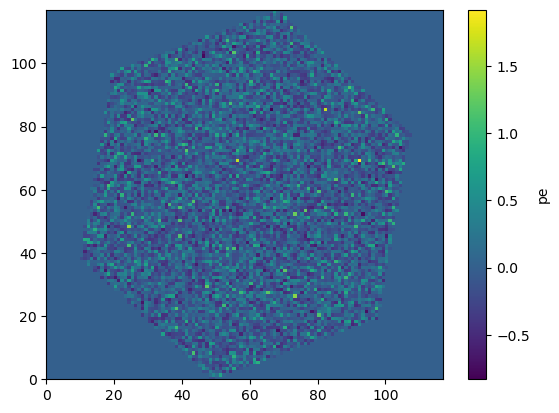

In [21]:

plt.figure()
plt.pcolor(waveform[:,:,5],cmap='viridis')
plt.colorbar(label="pe")
plt.show()
plt.close()